<a href="https://colab.research.google.com/github/smmurdock/Learn-TensorFlow/blob/main/01_neural_network_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

**Example Regression Problems:**

* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should I save each week for fuel?

**What we're going to cover:**

* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modeling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

In [35]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating data to view and fit

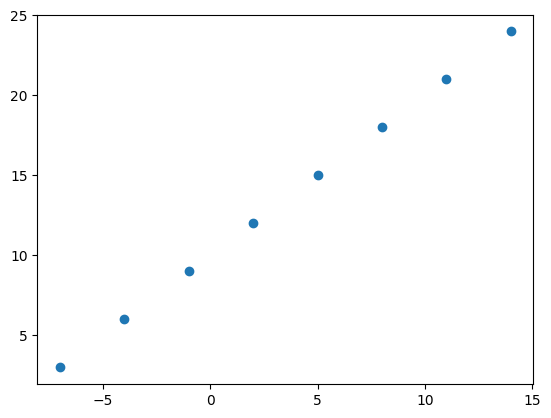

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [37]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [38]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [39]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [40]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [41]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [42]:
X[0].ndim

0

In [43]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [44]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
# # Turn our NumPy arrays into tensors with dtype float32
# X = tf.constant(X)
# y = tf.constant(y)
# X, y

In [46]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

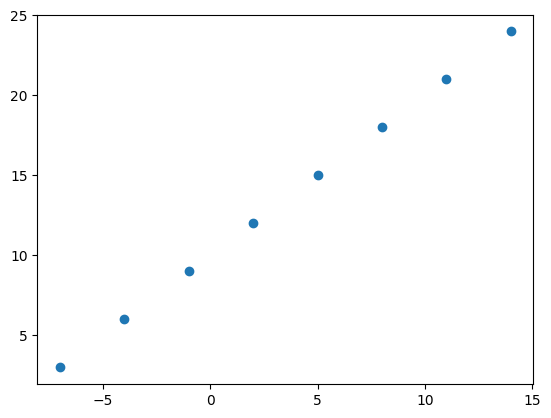

In [47]:
plt.scatter(X, y);

## Steps in Modeling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a neural network (if using a deep learning model).
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [48]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 20.7281 - mae: 20.7281
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 20.3797 - mae: 20.3797
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 20.0985 - mae: 20.0985
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 19.8172 - mae: 19.8172
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 19.5360 - mae: 19.5360


In [49]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [52]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[-21.112951]], dtype=float32)

## Improve our model